# KNN: K-nearest neighbor

Principle: K-nearest neighbor algorithm is to find the distance between two points if most of the K are similarest (that is, the nearest neighbor in the feature space). Most of a sample in the feature space belong to a certain category, then the sample also belongs to this category.

Application: It can be used for both classification and regression

#### a. KNN Classification

In [23]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets

# support Chinese
mpl.rcParams["font.family"] = "SimHei" 
# show negative signs normally in Chinese (-)
mpl.rcParams["axes.unicode_minus"] = False

In [2]:
#### Processing of machine learning datasets

In [24]:
# import Iris data
iris_datas = datasets.load_iris()
iris = pd.DataFrame(
    iris_datas["data"],
    columns=["SpealLength", "Spealwidth", "PetalLength", "Petalwidth"])
target = pd.DataFrame(iris_datas["target"], columns=["Species"])
iris = pd.concat([iris, target], axis=1)
# show the first 5 rows
# iris.head(5)
# Random sampling (The default is 1)
iris.sample()

,SpealLength,Spealwidth,PetalLength,Petalwidth,Species
4,5.0,3.6,1.4,0.2,0


In [4]:
# Dummy variable handling (Type text is mapped to numeric types)
# iris["Species"] = iris["Species"].map({"Iris-versicolor":0, "Iris-setosa":1, "Iris-virginica":2})

In [5]:
# delete Id coulum
# iris.drop("Id", axis=1, inplace=True)

In [25]:
# find if there is duplicate values
iris.duplicated().any()  # True: exist duplicate values
# see how many data we have
len(iris)
# delete duplicate values
iris.drop_duplicates(inplace=True)
# see how many data we have after deleting
len(iris)

149

In [26]:
# find how many data in each species
iris["Species"].value_counts()

0    50
1    50
2    49
Name: Species, dtype: int64

In [8]:
#### KNN Algorithm Implements Classification

In [27]:
class KNN:
    """K-nearest neighbor algorithm implements classification"""

    def __init__(self, k):
        """Initialize Method
        Parameters:
        k:int (the number of neighbors)
        """
        self.k = k  # use k that we give to initialize k in self

    def fit(self, X, y):  # KNN is lazy learning algorithm
        """Training Method
        Parameters:
        X:class number type,(eg. list,np.array,pandas dataframe); shape: {sample size,feature size}
           [training sample features]
        y:class number type, shape: {sample size} [each sample target value----label]
        """
        # transfer X to ndarray arraytype
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
    def predict(self, X):
        """Based on the sample transmitted by parameters, predict the sample data
        Parameters: 
        X:class number type,(eg. list,np.array,pandas dataframe); shape: {sample size,feature size}
           [training sample features]
           
        return: 
        result: arraytype [prediction results]
        """
        X = np.asarray(X)
        result = []
        # traverse ndarray: take a row in the array every time
        for x in X:
            # ndarray can be calculated as a whole
            # Broadcast mechanism: extend ndarray with a small number of rows
            # to be the same size with larger one 
            # find the distance between each sample in test set and all samples 
            # in train set in sequence
            dis = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
            # return the element index in the original array after sorting    
            index = dis.argsort()    
            # only take the first k element to the nearest 
            index = index[:self.k]
            # use the form of list to index
            self.y[index] 
            # count the number of occurrences of each element 
            # (each element must be nonnegative number)
            count = np.bincount(self.y[index])
            # find the index of the maximum value (the most frequent occurrence)
            # the index represents the maximum type we need
            result.append(count.argmax())
        return np.asarray(result) 
            
   

    def predict2(self, X):
        """Based on the sample transmitted by parameters, predict the sample data
        ---------- Consider weight: take reciprocal of the distance as weight 
        Parameters: 
        X:class number type,(eg. list,np.array,pandas dataframe); shape: {sample size,feature size}
           [training sample features]
           
        return: 
        result: arraytype [prediction results]
        """
        X = np.asarray(X)
        result = []
        # traverse ndarray: take a row in the array every time
        for x in X:
            # ndarray can be calculated as a whole
            # Broadcast mechanism: extend ndarray with a small number of rows
            # to be the same size with larger one 
            # find the distance between each sample in test set and all samples 
            # in train set in sequence
            dis = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
            # return the element index in the original array after sorting    
            index = dis.argsort()    
            # only take the first k element to the nearest 
            index = index[:self.k]
            # use the form of list to index
            self.y[index] 
            # count the number of occurrences of each element 
            # (each element must be nonnegative number)
            # use weights to consider weight, weight is the reciprocal of the distance
            count = np.bincount(self.y[index], weights=1 / dis[index])
            # find the index of the maximum value (the most frequent occurrence)
            # the index represents the maximum type we need
            result.append(count.argmax())
        return np.asarray(result)           

In [28]:
# divide the test set and training set
# we can also use train_test_split
# extract data of each type
t0 = iris[iris["Species"] == 0]
t1 = iris[iris["Species"] == 1]
t2 = iris[iris["Species"] == 2]
# scramble data order in each type
t0 = t0.sample(len(t0), random_state=0)
t1 = t1.sample(len(t1), random_state=0)
t2 = t0.sample(len(t2), random_state=0)
# build the test set and training set
train_X = pd.concat([t0.iloc[:40, :-1],t1.iloc[:40, :-1],
                     t2.iloc[:40, :-1]], axis=0) # according to column stitching
train_y = pd.concat([t0.iloc[:40, -1],t1.iloc[:40, -1],
                     t2.iloc[:40, -1]], axis=0)
test_X = pd.concat([t0.iloc[40:, :-1],t1.iloc[40:, :-1],
                     t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t0.iloc[40:, -1],t1.iloc[40:, -1],
                     t2.iloc[40:, -1]], axis=0)
# create object of KNN, train and test
knn = KNN(k=4)
# train
knn.fit(train_X, train_y)
# test, get the result of prediction
result = knn.predict(test_X)
# display(result)
# check the accuracy of prediction
display(np.sum(result == test_y)/len(result))

1.0

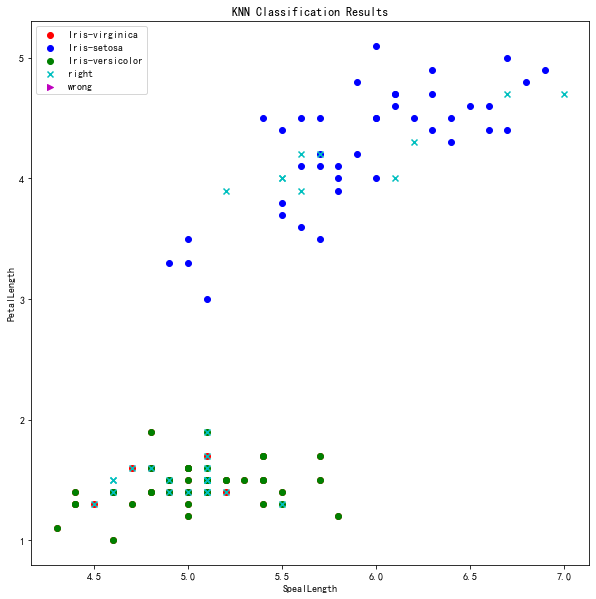

In [29]:
# result visualization
# {"Iris-virginica":0, "Iris-setosa":1, "Iris-versicolor":2}
# set the size of canvas
plt.figure(figsize=(10, 10))
# plot train data
plt.scatter(x=t0["SpealLength"][:40], y=t0["PetalLength"][:40],
            color="r",label="Iris-virginica")
plt.scatter(x=t1["SpealLength"][:40], y=t1["PetalLength"][:40],
            color="b",label="Iris-setosa")
plt.scatter(x=t2["SpealLength"][:40], y=t2["PetalLength"][:40],
            color="g",label="Iris-versicolor")

# plot test data
right = test_X[result == test_y]
wrong = test_X[result != test_y]
plt.scatter(x=right["SpealLength"],y=right["PetalLength"],color="c",marker="x",label="right")
plt.scatter(x=wrong["SpealLength"],y=wrong["PetalLength"],color="m",marker=">",label="wrong")
plt.xlabel("SpealLength")
plt.ylabel("PetalLength")
plt.title("KNN Classification Results")
plt.legend(loc="best")
plt.show()

In [30]:
# test again (consider weights)
result2 = knn.predict2(test_X)
np.seterr(divide='ignore', invalid='ignore')
display(np.sum(result == test_y) / len(result2))

1.0

#### b. KNN Regression

In [31]:
# use SpealLength, Spealwidth and PetalLength to predict Petalwidth
# delete Species column (Type information has no use in regression)
iris.drop(["Species"], axis=1, inplace=True)

In [ ]:
#### KNN Algorithm Implements Regression

In [32]:
class KNN_regression:
    """Regression Predict:
    Based on the first 3 features, find k nearest neighbors.
    Then predict current samples' the fourth feature through
    k nearest neighbors' the fourth feature"""
    
    def __init__(self, k):
        """Initialize Method
        Parameters:
        k:int (the number of neighbors)
        """
        self.k = k
        
    def fit(self, X, y):
        """Training Method
        Parameters:
        X:class number type,(feature matrix); shape: {sample size,feature size}
           [training sample features(property)]
        y:class number type(target label), shape: {sample size} 
           [each sample target value----label]
        """
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
    def predict(self, X):
        """Based on the sample transmitted by parameters, predict the sample data
        Parameters: 
        X:class number type; shape: {sample size,feature size}
           [training sample features]
           
        Return: 
        result: arraytype [prediction results]
        """
        # transform arraytype
        X = np.asarray(X)
        # save prediction results
        result = []
        for x in X:
            # calculate distance between target value and each x in training set
            dis = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
            # return the element index in the original array after sorting    
            index = dis.argsort()
            # only take the first k element to the nearest (index in the original array)
            index = index[:self.k]
            # calculate mean value and 
            # return it in the list form of results
            result.append(np.mean(self.y[index]))
        return np.asarray(result)
    
    def predict2(self, X):
        """Based on the sample transmitted by parameters, predict the sample data
        (Consider wrights: the reciprocal of distance between each node(neighbor) /
        the sum of all the reciprocals of distance between each node)
        Parameters: 
        X:class number type; shape: {sample size,feature size}
           [training sample features]
           
        Return: 
        result: arraytype [prediction results]
        """
        # transform arraytype
        X = np.asarray(X)
        # save prediction results
        result = []
        for x in X:
            # calculate distance between target value and each x in training set
            dis = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
            # return the element index in the original array after sorting    
            index = dis.argsort()
            # only take the first k element to the nearest (index in the original array)
            index = index[:self.k]
            # calculate the sum of all the reciprocals of distance between each neighbor node
            # add a very small value to avoid zero divisor
            s = np.sum(1 / dis[index] + 0.000001)
            # calculate the weights
            weight = (1 / (dis[index]+0.000001)) / s
            # use the neighbor node's label value multiplies corresponding weight 
            # to get prediction value
            result.append(np.sum(self.y[index] * weight))
        return np.asarray(result)

In [33]:
# build training set and test set
t = iris.sample(len(iris), random_state=0)
train_X = t.iloc[:120, :-1]
train_y = t.iloc[:120, -1]
test_X = t.iloc[120:, :-1]
test_y = t.iloc[120:, -1]

In [34]:
# create object of KNN, train and test
knn = KNN_regression(k=3)
# train
knn.fit(train_X, train_y)
# test, get the result of prediction
result = knn.predict(test_X)
# check the accuracy of regression
np.mean((result - test_y) ** 2)

0.050919540229885034

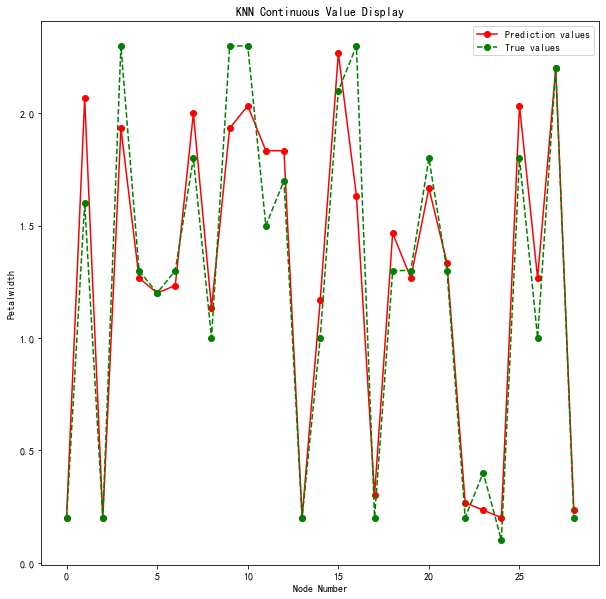

In [35]:
# set the size of canvas
plt.figure(figsize=(10, 10))
# plot prediction values
plt.plot(result, "ro-", label="Prediction values")
# plot true values
plt.plot(test_y.values, "go--", label="True values")
plt.title("KNN Continuous Value Display")
plt.xlabel("Node Number")
plt.ylabel("Petalwidth")
plt.legend()
plt.show()


In [36]:
# test, get the result of prediction(consider weights)
result = knn.predict2(test_X)
# check the accuracy of regression
np.mean((result - test_y) ** 2)

0.05353205048065496